1. Za pomoci níže uvedeného kódu naimportujte knihovny a do proměnné url získejte adresu datasetu

```python
# Import potrebnych knihoven
import pandas as pd
import numpy as np
import seaborn

# Stazeni .csv souboru publikovaneho na github.com
url = 'https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'
```

2. Načtete data z proměnné url do pandas dataframe, proměnnou pojmenujte ```df```.
3. Upravte datový typ sloupce ```DATE``` na ```datetime```.
4. Přidejte do ```df``` sloupec ```YEAR```


In [9]:
# Buňka pro body 1-4

import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/petrrozkosny/pydata/main/pydata_data.csv'
df = pd.read_csv(url,delimiter=';')
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR'] = df['DATE'].dt.year

5. Filtrujte df na NAME == RUZYNE a YEAR == 2020
6. Vytvořte si sloupec TYP_SRAZEK, kdy pokud PRCP je NaN, tak "NEZJISTENO", pokud PRCP == 0 tak neprselo, jinak PRSELO
7. Agregujte df dle jednotlivých TYP_SRAZEK
8. Za pomoci metody plot.pie() zobrazte koláčový graf s počtem DATE dle jednotlivých TYP_SRAZEK
9. Výsledný df uložte do .csv s oddělovačem ';'
10. Uložte koláčový graf do .pdf


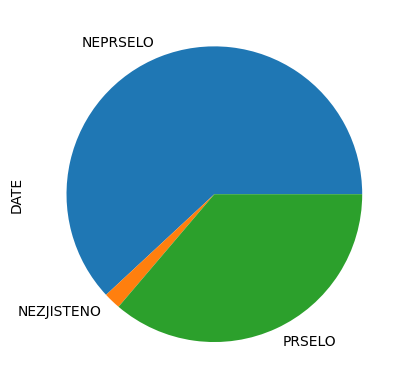

In [10]:
# Buňka pro body 5-10
import matplotlib.pyplot as plt

df = df.loc[(df['NAME']=='RUZYNE') & (df['YEAR']==2020)]
df.loc[df['PRCP'].isna(),'TYP_SRAZEK'] = 'NEZJISTENO'
df.loc[df['PRCP'] == 0,'TYP_SRAZEK'] = 'NEPRSELO'
df.loc[df['PRCP']> 0,'TYP_SRAZEK'] = 'PRSELO'

df = df.groupby(by='TYP_SRAZEK')['DATE'].count()
df.plot.pie()
plt.savefig('kolacovy_graf_ruzyne.png')


df.to_csv('df_ruzyne_2020.csv',sep=';',index=False)

Bonus 1: Která lokalita má nejvíce NaN hodnot ve sloupci PRCP?